# DCGAN

In [1]:
import os
import tensorflow
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np

In [2]:
os.chdir('C:/Users/feher/Documents/Data_Projects/GAN/')
from gan2 import DCGAN

In [3]:
genSize = (100,)

In [4]:
from tensorflow.keras.layers import Input, Dense,Reshape, Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation
from tensorflow.keras.layers import Conv2DTranspose,Flatten, LeakyReLU
#Discriminator

kernel_size = 5
layer_filters = [32, 64, 128, 256]
inpDis = Input(shape=(28,28,1))
x = inpDis
for filters in layer_filters:
    # first 3 convolution layers use strides = 2
    # last one uses strides = 1
    if filters == layer_filters[-1]:
        strides = 1
    else:
        strides = 2
    x = LeakyReLU(alpha=0.2)(x)
    x = Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding='same')(x)
x = Flatten()(x)
x = Dense(1)(x)
x = Activation('sigmoid')(x)
discriminator = Model(inpDis, x, name='discriminator')
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        832       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)       

In [5]:
#Generator

kernel_size = 5
layer_filters = [128, 64, 32, 1]

inputs = Input(shape=genSize)

x = Dense(7 * 7 * layer_filters[0])(inputs)
x = Reshape((7,7, layer_filters[0]))(x)

for filters in layer_filters:
    # first two convolution layers use strides = 2
    # the last two use strides = 1
    if filters > layer_filters[-2]:
        strides = 2
    else:
        strides = 1
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(filters=filters,kernel_size=kernel_size,strides=strides,padding='same')(x)
x = Activation('sigmoid')(x)
generator = Model(inputs, x, name='generator')
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       51

In [6]:
gan = DCGAN(generator=generator,discriminator=discriminator,DiscrOptimizer=RMSprop(lr=2e-4, decay=6e-8),GanOptimizer=RMSprop(lr=1e-4, decay=3e-8))

In [7]:
import matplotlib.pyplot as plt
def viewMinst(mtr,ep=None,save=True):
    """view minst"""
    path = "D:/Project/DeepLearning/GAN/DCGAN/ouput/Epoch_{}".format(ep)
    title = "Epoch : {}".format(ep)
    
    mtr2 = np.clip(mtr * 255,0,255).astype('uint8')
    plt.imshow(mtr2.reshape(28,28), cmap='gray')
    
    if ep != None:
        if not os.path.isdir(path):
            os.mkdir(path)
        #plt.title(title)
    if save == True and ep != None:
        i = 0
        while os.path.exists(path + '/Epoch{}_{}.jpg'.format(ep,i)):
            i+=1
        plt.savefig(path + '/Epoch{}_{}.jpg'.format(ep,i))

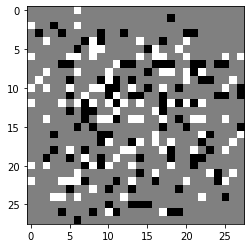

In [8]:
gan.GenerateOutputs(batchSize=16,viewFunction=viewMinst,returnArray=False,ep=0)
gan.generateBatchEval()

In [9]:
from tensorflow.keras.datasets import mnist
(xtr,_),_ = mnist.load_data()
xtr = xtr.reshape((-1,28,28,1)).astype('float32')/255

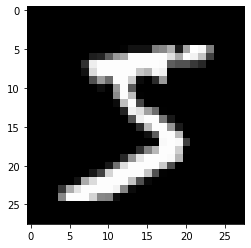

In [10]:
viewMinst(xtr[0],ep=None,save=False)

Epoch 1
117/117 [==============================] - 122s 1s/step
Discrimiator: (loss,acc)=(0.0006986771477386355,1.0)
 	 Adversial: (loss,acc)=(2.6589273716126627e-07,1.0)
Epoch 2
117/117 [==============================] - 102s 873ms/step
Discrimiator: (loss,acc)=(0.00021067119087092578,1.0)
 	 Adversial: (loss,acc)=(7.358487129211426,0.0)
Epoch 3
117/117 [==============================] - 104s 888ms/step
Discrimiator: (loss,acc)=(0.11280561238527298,0.99609375)
 	 Adversial: (loss,acc)=(9.659490585327148,0.0)
Epoch 4
117/117 [==============================] - 107s 916ms/step
Discrimiator: (loss,acc)=(0.0841422900557518,0.99609375)
 	 Adversial: (loss,acc)=(0.718354344367981,0.478515625)
Epoch 5
117/117 [==============================] - 105s 899ms/step
Discrimiator: (loss,acc)=(0.329184353351593,0.888671875)
 	 Adversial: (loss,acc)=(0.3071974813938141,0.97265625)
Epoch 6
117/117 [==============================] - 104s 890ms/step
Discrimiator: (loss,acc)=(0.6408595442771912,0.62109375)

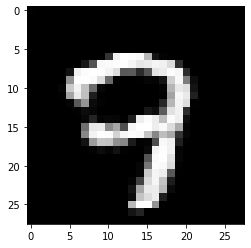

In [11]:
gan.train(x_train=xtr,batch_size=1024,epoch=31,outputTr=viewMinst,evalStep=1)

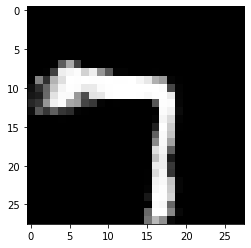

In [12]:
gan.GenerateOutputs(batchSize=1,viewFunction=viewMinst,returnArray=False)

In [13]:
gan.saveGan("D:/Project/DeepLearning/GAN/DCGAN/save")